In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100, 1)
y = 3 + 4 * X + np.random.randn(100, 1)

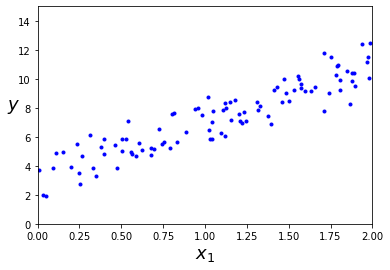

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
X
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
X_b

array([[1.        , 1.79647613],
       [1.        , 1.55360666],
       [1.        , 0.15295991],
       [1.        , 1.9734582 ],
       [1.        , 0.54273193],
       [1.        , 0.19716585],
       [1.        , 1.65862847],
       [1.        , 1.41335107],
       [1.        , 1.23443761],
       [1.        , 0.31196173],
       [1.        , 0.95699223],
       [1.        , 1.56111205],
       [1.        , 0.60724788],
       [1.        , 0.62337966],
       [1.        , 0.00628181],
       [1.        , 0.3484868 ],
       [1.        , 1.75081125],
       [1.        , 0.88349298],
       [1.        , 1.968469  ],
       [1.        , 0.79141593],
       [1.        , 1.43037291],
       [1.        , 0.56383809],
       [1.        , 0.72761928],
       [1.        , 0.38145198],
       [1.        , 0.69412474],
       [1.        , 1.09447504],
       [1.        , 1.98354576],
       [1.        , 1.32840343],
       [1.        , 0.39849191],
       [1.        , 0.08992288],
       [1.

![Screenshot 2021-08-09 at 09-00-29 Hands-On Machine Learning with Scikit-Learn and TensorFlow - 2-Aurélien-Géron-Hands-On-Ma[...].png](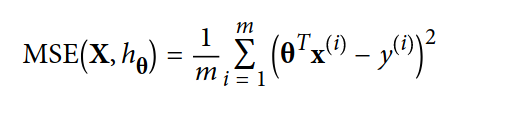)

![Screenshot 2021-08-09 at 09-00-53 Hands-On Machine Learning with Scikit-Learn and TensorFlow - 2-Aurélien-Géron-Hands-On-Ma[...].png](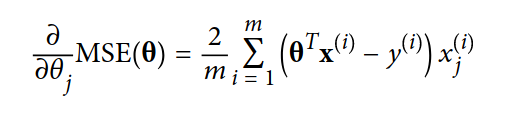)

![Screenshot 2021-08-09 at 09-01-06 Hands-On Machine Learning with Scikit-Learn and TensorFlow - 2-Aurélien-Géron-Hands-On-Ma[...].png](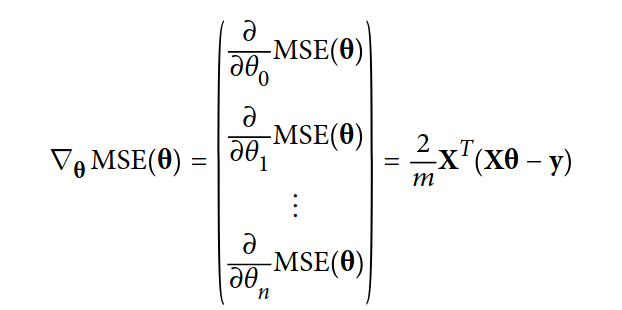)

## Batch Gradient Descent

![Screenshot 2021-08-09 at 09-01-16 Hands-On Machine Learning with Scikit-Learn and TensorFlow - 2-Aurélien-Géron-Hands-On-Ma[...].png](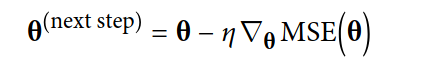)

In [ ]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [90]:
theta

array([[3.23219129],
       [3.82565077]])

In [91]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] 

In [92]:
X_new_b.dot(theta)

array([[ 3.23219129],
       [10.88349282]])

In [93]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

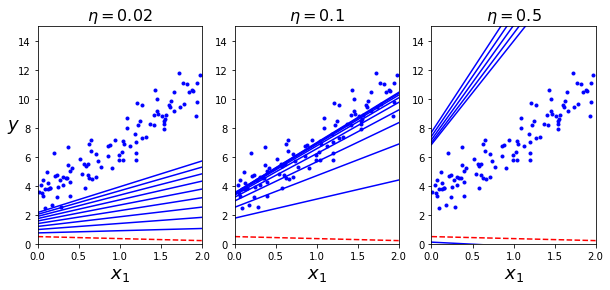

In [ ]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization
plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

##Stochastic Gradient Descent


In [ ]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

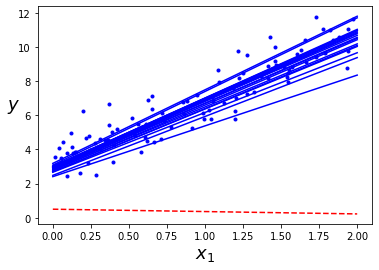

In [ ]:

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.show()                                           

In [ ]:
theta

array([[3.24096438],
       [3.81292032]])

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_


(array([3.16828361]), array([3.7589974]))

##Mini-batch gradient descent

In [ ]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [ ]:
theta

array([[3.23219129],
       [3.82565077]])

In [ ]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

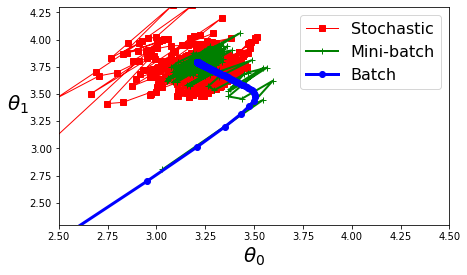

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper right", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 4.3])
plt.show()